# Automatic Apparent Age Estimation (TASK 1)

*   Authors: Ikram ACHALI / Lokeshwarn VENGADABADY








## **I - Introduction**
In This task we will try to solve the fairness and bias problem in the APPA-REAL dataset.
First we will work on the Data Augmentation stategy to solve the problem. Second, we'll focus on the Custom Loss strategy without data augmentation.

### **1. The setup**
We need to install some packages and import some libraries.

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install h5py
!pip install pandas
!pip install image-classifiers==1.0.0b1
!pip install keras_applications

  Preparing metadata (setup.py) ... done
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0b1-py3-none-any.whl size=19956 sha256=929f930fcf6313182677e0e536403e93c283439f78af418dc5c2954e71bc4a72
  Stored in directory: /root/.cache/pip/wheels/6c/ef/e0/420a70a988dc10cada230cb6f7f2bc028119b69682cda4e8f1
Successfully built image-classifiers
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Check the Tensorflow version
import tensorflow as tf
import pandas as pd
import cv2 as cv
from PIL import Image
import numpy as np
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.17.1
Num GPUs Available:  1


In [ ]:
# downloading the data
!wget http://158.109.8.102/AppaRealAge/appa-real-release.zip

--2024-11-17 13:51:20--  http://158.109.8.102/AppaRealAge/appa-real-release.zip
Connecting to 158.109.8.102:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 885442010 (844M) [application/zip]
Saving to: ‘appa-real-release.zip’

appa-real-release.z 100%[===================>] 844.42M  6.10MB/s    in 2m 8s   

2024-11-17 13:53:29 (6.58 MB/s) - ‘appa-real-release.zip’ saved [885442010/885442010]



In [ ]:
# Unzipping the dataset
from zipfile import ZipFile
with ZipFile('/content/appa-real-release.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

Data decompressed successfully


In [ ]:
#base_dir  = '/home/vlod08/Downloads/appa-real-release/'
base_dir = '/content/appa-real-release/'   # base_dir for the google collab

train_csv = base_dir + 'gt_avg_train.csv'
test_csv  = base_dir + 'gt_avg_test.csv'
valid_csv = base_dir + 'gt_avg_valid.csv'

train_df = pd.read_csv(train_csv)
test_df  = pd.read_csv(test_csv)
valid_df = pd.read_csv(valid_csv)

print("\n\n### Train CSV ###")
print(train_df.head(5))
print("\n\n### Test CSV ###")
print(test_df.head(5))
print("\n\n### Valid CSV ###")
print(valid_df.head(5))
print("\n")
print(f'Number of Examples in Train : {train_df.shape[0]}  = {100 * train_df.shape[0] / (train_df.shape[0] + test_df.shape[0] + valid_df.shape[0]) } %')
print(f'Number of Examples in Test  : { test_df.shape[0]}  = {100 * test_df.shape[0]  / (train_df.shape[0] + test_df.shape[0] + valid_df.shape[0]) } %')
print(f'Number of Examples in Valid : {valid_df.shape[0]}  = {100 * valid_df.shape[0] / (train_df.shape[0] + test_df.shape[0] + valid_df.shape[0]) } %')



### Train CSV ###
    file_name  num_ratings  apparent_age_avg  apparent_age_std  real_age
0  000000.jpg           36          5.000000          1.146423         4
1  000001.jpg           63         20.079365          4.096819        18
2  000002.jpg           38         76.815789          6.133009        80
3  000003.jpg           38         55.657895          7.864653        50
4  000004.jpg           15         17.666667          3.457222        17


### Test CSV ###
    file_name  num_ratings  apparent_age_avg  apparent_age_std  real_age
0  005613.jpg           39         23.205128          5.530678        19
1  005614.jpg           38         70.736842          6.570549        76
2  005615.jpg           38         55.368421          5.874457        40
3  005616.jpg           36         24.277778          2.224681        21
4  005617.jpg           39         25.230769          5.691460        34


### Valid CSV ###
    file_name  num_ratings  apparent_age_avg  apparent_age_std  r

In [ ]:
train_img_names = train_df['file_name']
test_img_names  = test_df['file_name']
valid_img_names = valid_df['file_name']
image_list = []
generate_X = True
generate_Y = True
generate_Meta = True



Nb_train = 4000
Nb_test  = 4000
Nb_valid = 1000
if (generate_X == True):
    for i in train_img_names[:Nb_train]:
        img = Image.open(f'{base_dir}/train/{i}').convert("RGB")
        img = img.resize((224,224))
        img_array = np.array(img)
        image_list.append(img_array)
        if (float(i.strip('.jpg')) % 1000==0):
            print(f"completed {i.strip('.jpg')} images")
    np.save(f'{base_dir}/data_train.npy', image_list)

    image_list = []
    for i in test_img_names[:Nb_test]:
        img = Image.open(f'{base_dir}/test/{i}').convert("RGB")
        img = img.resize((224,224))

        img_array = np.array(img)
        image_list.append(img_array)
        if (float(i.strip('.jpg')) % 1000==0):
            print(f"completed {i.strip('.jpg')} images")

    np.save(f'{base_dir}/data_test.npy', image_list)

    image_list = []
    for i in valid_img_names[:Nb_valid]:
        img = Image.open(f'{base_dir}/valid/{i}').convert("RGB")
        img = img.resize((224,224))
        img_array = np.array(img)
        image_list.append(img_array)
        if (float(i.strip('.jpg')) % 1000==0):
            print(f"completed {i.strip('.jpg')} images")
    np.save(f'{base_dir}/data_valid.npy', image_list)

if (generate_Y==True):
    np.save(f'{base_dir}/labels_train.npy', train_df['real_age'][:Nb_train])
    np.save(f'{base_dir}/labels_test.npy',   test_df['real_age'][:Nb_test] )
    np.save(f'{base_dir}/labels_valid.npy', valid_df['real_age'][:Nb_valid])

if (generate_Meta==True):
    np.save(f'{base_dir}/meta_data_train.npy', train_df[[col for col in train_df.columns if col not in ['real_age', 'file_name']]][:Nb_train])
    np.save(f'{base_dir}/meta_data_test.npy',   test_df[[col for col in test_df.columns if col not in  ['real_age', 'file_name']]][:Nb_test ])
    np.save(f'{base_dir}/meta_data_valid.npy', valid_df[[col for col in valid_df.columns if col not in ['real_age', 'file_name']]][:Nb_valid])


completed 000000 images
completed 001000 images
completed 002000 images
completed 003000 images
completed 006000 images
completed 007000 images
completed 005000 images


In [ ]:
import numpy as np

# loading the train data (with labels)
X_train = np.load(f'{base_dir}data_train.npy')
Y_train = np.load(f'{base_dir}/labels_train.npy')
M_train = np.load(f'{base_dir}/meta_data_train.npy')

# loading the validation data (with labels)
X_valid = np.load(f'{base_dir}/data_valid.npy')
Y_valid = np.load(f'{base_dir}/labels_valid.npy')
M_valid = np.load(f'{base_dir}/meta_data_valid.npy')
# train labels are real numbers, ranging from ~0.9 to ~89 (years old);
# we will re-scale the labels to [0,1] by using a normalization factor of 100,
# assuming there is no sample with age > 100.
Y_train = Y_train/100
Y_valid = Y_valid/100
# them using the raw data, i.e., the apparent age values
print('Train data size and shape', X_train.shape)
print('Train labels size and shape', Y_train.shape)
print('Train metadata size and shape', M_train.shape)
print('----')
print('Valid data size and shape', X_valid.shape)
print('Valid labels size and shape', Y_valid.shape)
print('Valid metadata size and shape', M_valid.shape)
print('----')
#print('Test data size and shape', X_test.shape)

Train data size and shape (4000, 224, 224, 3)
Train labels size and shape (4000,)
Train metadata size and shape (4000, 3)
----
Valid data size and shape (1000, 224, 224, 3)
Valid labels size and shape (1000,)
Valid metadata size and shape (1000, 3)
----


### **3. Defining the model**

NASNet refers to Neural Architecture Search Network, a family of models that were designed automatically by learning the model architectures directly on the dataset of interest.

Here we consider NASNet-A, the highest performance model that was found for the CIFAR-10 dataset, and then extended to ImageNet 2012 dataset, obtaining state of the art performance on CIFAR-10 and ImageNet 2012.

In [ ]:

%env CM_FRAMEWORK=tf.keras
#from classification_models.tfkeras import Classifiers

#NasNet, preprocess_input = Classifiers.get('nasnetmobile')

#Prepare our images
#X_train_processed=preprocess_input(np.copy(X_train))
#X_valid_processed=preprocess_input(np.copy(X_valid))


env: CM_FRAMEWORK=tf.keras


In [ ]:
### Original

# # defining the early stop criteria
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# # build model
# base_model=NasNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
# output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# model = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])
#

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
base_model = tf.keras.applications.NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
preprocess_input = tf.keras.applications.nasnet.preprocess_input
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])
for l in model.layers:
  l.trainable =False
X_train_processed=preprocess_input(np.copy(X_train))
X_valid_processed=preprocess_input(np.copy(X_valid))
#base_model.summary()
print(Y_train[:20])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[0.04 0.18 0.8  0.5  0.17 0.27 0.24 0.43 0.26 0.39 0.17 0.51 0.02 0.01
 0.06 0.18 0.24 0.05 0.4  0.16]
Num GPUs Available:  1


In [ ]:
### Nasnet basic
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
# Load NASNetMobile with pre-trained ImageNet weights, excluding the top layer
base_model = tf.keras.applications.NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input
base_model.trainable = False
# Adding custom layers
x = base_model.output
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# Create the new model with NASNetMobile as the base
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_train))
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
Nasnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history = Nasnet_model.fit(X_train_processed_Nasnet, Y_train, validation_data=(X_valid_processed_Nasnet, Y_valid), batch_size=32, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - loss: 0.0393 - mae: 0.1591 - val_loss: 0.0437 - val_mae: 0.1686
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0400 - mae: 0.1603 - val_loss: 0.0436 - val_mae: 0.1685
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0405 - mae: 0.1609 - val_loss: 0.0435 - val_mae: 0.1682
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0400 - mae: 0.1600 - val_loss: 0.0435 - val_mae: 0.1682
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0394 - mae: 0.1589 - val_loss: 0.0433 - val_mae: 0.1678
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0401 - mae: 0.1600 - val_loss: 0.0433 - val_mae: 0.1678
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0392 - mae: 0.1586 - val_loss: 0.0432 - val_mae: 0.1678
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0396 - mae: 0.1595 - val_loss: 0.0431 - val_mae: 0.1675
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━

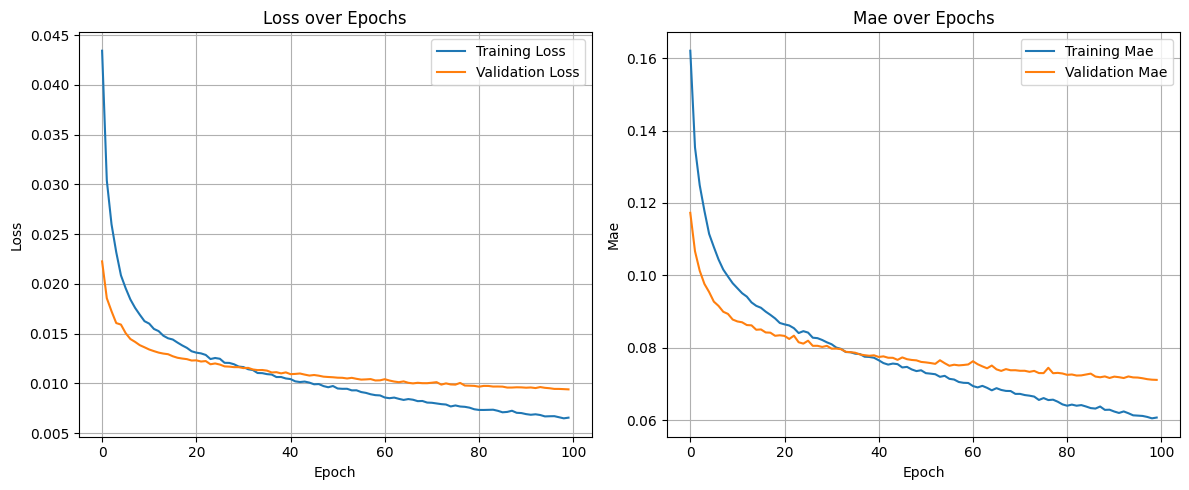

Current learning rate: 1e-05


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation metrics from the Keras History object.

    Parameters:
    - history: Keras History object returned by model.fit()
    """
    # Extract metric names from history
    metrics = list(history.history.keys())

    # Identify training and validation metrics
    train_metrics = [m for m in metrics if not m.startswith('val_')]
    val_metrics = [m for m in metrics if m.startswith('val_')]

    # Number of metrics to plot
    num_metrics = len(train_metrics)

    # Set up the matplotlib figure
    plt.figure(figsize=(6 * num_metrics, 5))

    for i, metric in enumerate(train_metrics):
        plt.subplot(1, num_metrics, i + 1)
        plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')
        # Check if validation metric exists
        val_metric = f'val_{metric}'
        if val_metric in history.history:
            plt.plot(history.history[val_metric], label=f'Validation {metric.capitalize()}')
        plt.title(f'{metric.capitalize()} over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_loss_mae(history):
    """
    Plots training and validation MAE from the Keras history object.

    Parameters:
    - history: Keras History object from model.fit()
    """
    plt.figure(figsize=(10, 6))

    # Plot MAE for training and validation
    plt.plot(history.history['mae'], label='Training MAE')
    if 'val_mae' in history.history:
        plt.plot(history.history['val_mae'], label='Validation MAE')

    plt.title('Model Mean Absolute Error (MAE)')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
#plot_loss_mae(history)
plot_training_history(history)

learning_rate = Nasnet_model.optimizer.learning_rate.numpy()
print("Current learning rate:", learning_rate)

In [ ]:
history

In [ ]:
### Nasnet implementation avec 0.7 de Dropout and with 1 trainable layer
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
# Load NASNetMobile with pre-trained ImageNet weights, excluding the top layer
base_model = tf.keras.applications.NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input
base_model.trainable = False
for layer in base_model.layers[-1:]:
    layer.trainable = True
# Adding custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.7)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# Create the new model with NASNetMobile as the base
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_train))
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("X_valid_processed_Nasnet shape:", X_valid_processed_Nasnet.shape)
print("Y_valid2 shape:", Y_valid.shape)


19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Num GPUs Available:  1
X_valid_processed_Nasnet shape: (1000, 224, 224, 3)
Y_valid2 shape: (1000,)


In [ ]:
Nasnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history = Nasnet_model.fit(X_train_processed_Nasnet, Y_train, validation_data=(X_valid_processed_Nasnet, Y_valid), batch_size=32, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 330ms/step - loss: 10.2763 - mae: 0.1316 - val_loss: 9.7772 - val_mae: 0.1294
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - loss: 9.6151 - mae: 0.1233 - val_loss: 9.1445 - val_mae: 0.1266
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 8.9931 - mae: 0.1229 - val_loss: 8.5484 - val_mae: 0.1229
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - loss: 8.4047 - mae: 0.1184 - val_loss: 7.9866 - val_mae: 0.1206
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - loss: 7.8512 - mae: 0.1150 - val_loss: 7.4573 - val_mae: 0.1194
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - loss: 7.3297 - mae: 0.1157 - val_loss: 6.9586 - val_mae: 0.1171
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - loss: 6.8379 - mae: 0.1115 - val_loss: 6.4887 - val_mae: 0.1167
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - loss: 6.3737 - mae: 0.1093 - val_loss: 6.0459 - val_mae: 0.1169
Epoch 9/100
125/125 ━━━

In [ ]:
img = Image.open('/content/appa-real-release/test/005614.jpg').convert('RGB')
img = img.resize((224,224))
img_array = np.array(img)
img = np.expand_dims(img_array, axis=0)
print(np.shape(img))
Nasnet_model.predict(img)

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.3931699]], dtype=float32)

In [ ]:
### Nasnet implementation avec 0.7 de Dropout and with 5 trainable layer
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
# Load NASNetMobile with pre-trained ImageNet weights, excluding the top layer
base_model = tf.keras.applications.NASNetMobile(input_shape=(400, 400, 3), weights='imagenet', include_top=False)
#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input

base_model.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Adding custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
#x = tf.keras.layers.Dropout(0.7)(x)  # Dropout with 50% probability
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model with NASNetMobile as the base
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_train))
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
Nasnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history = Nasnet_model.fit(X_train_processed_Nasnet, Y_train, validation_data=(X_valid_processed_Nasnet, Y_valid), batch_size=32, epochs=100, shuffle=True, verbose=1,callbacks=[early_stopping_Nasnet])

In [ ]:
### Nasnet implementation avec 0.5 de Dropout and with 15 trainable layer
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
# Load NASNetMobile with pre-trained ImageNet weights, excluding the top layer
base_model = tf.keras.applications.NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input

base_model.trainable = False
for layer in base_model.layers[-15:]:
    layer.trainable = True

# Adding custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)  # Dropout with 50% probability
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model with NASNetMobile as the base
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_train))
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
Nasnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history = Nasnet_model.fit(X_train_processed_Nasnet, Y_train, validation_data=(X_valid_processed_Nasnet, Y_valid), batch_size=32, epochs=100, shuffle=True, verbose=1,callbacks=[early_stopping_Nasnet])

In [ ]:
### Nasnet implementation avec 0.5 de Dropout and with 15 trainable layer
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
# Load NASNetMobile with pre-trained ImageNet weights, excluding the top layer
base_model = tf.keras.applications.NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input

base_model.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Adding custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.6)(x)  # Dropout with 50% probability
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model with NASNetMobile as the base
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_train))
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Num GPUs Available:  1


In [ ]:
import albumentations as A
from albumentations.core.composition import Compose, OneOf
from albumentations.pytorch import ToTensorV2
import numpy as np
import tensorflow as tf

# Define the Albumentations augmentation pipeline
augmentation_pipeline = A.Compose([
    A.Rotate(limit=10, p=0.5),                 # Rotation range of 10 degrees
    A.HorizontalFlip(p=0.5),                   # Horizontal flip
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=0, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
#    A.RandomZoom(scale_limit=0.1, p=0.5),
    A.Normalize(),                             # Normalization
])

# Custom data generator to apply Albumentations on-the-fly
class AlbumentationsDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, images, labels, batch_size=32, augmentations=None, shuffle=True):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.augmentations = augmentations
        self.shuffle = shuffle
        self.indices = np.arange(len(self.images))
        self.on_epoch_end()

    def __len__(self):
         return len(self.images) // self.batch_size

    def __getitem__(self, index):
         batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
         batch_images = [self.images[i] for i in batch_indices]
         batch_labels = [self.labels[i] for i in batch_indices]

         # Apply augmentations
         if self.augmentations:
             batch_images = [self.augmentations(image=image)['image'] for image in batch_images]
         return np.array(batch_images), np.array(batch_labels)

    def on_epoch_end(self):
         if self.shuffle:
             np.random.shuffle(self.indices)

# Initialize the custom data generator with augmentations
train_generator = AlbumentationsDataGenerator(
    images=X_train,
    labels=Y_train,
    batch_size=32,
    augmentations=augmentation_pipeline
)
Nasnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

# Training the model
history = Nasnet_model.fit(
    train_generator,
    validation_data=(X_valid_processed_Nasnet, Y_valid),
    epochs=100,
    shuffle=True,
    verbose=1,
    callbacks=[early_stopping_Nasnet]
)


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 95s 463ms/step - loss: 0.0470 - mae: 0.1711 - val_loss: 0.0285 - val_mae: 0.1320
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - loss: 0.0425 - mae: 0.1610 - val_loss: 0.0254 - val_mae: 0.1257
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - loss: 0.0374 - mae: 0.1511 - val_loss: 0.0240 - val_mae: 0.1223
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 0.0371 - mae: 0.1512 - val_loss: 0.0231 - val_mae: 0.1201
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - loss: 0.0333 - mae: 0.1423 - val_loss: 0.0228 - val_mae: 0.1212
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 0.0337 - mae: 0.1435 - val_loss: 0.0221 - val_mae: 0.1182
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 0.0305 - mae: 0.1360 - val_loss: 0.0218 - val_mae: 0.1176
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 0.0301 - mae: 0.1356 - val_loss: 0.0215 - val_mae: 0.1164
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 12

In [ ]:
print(np.shape(train_generator))

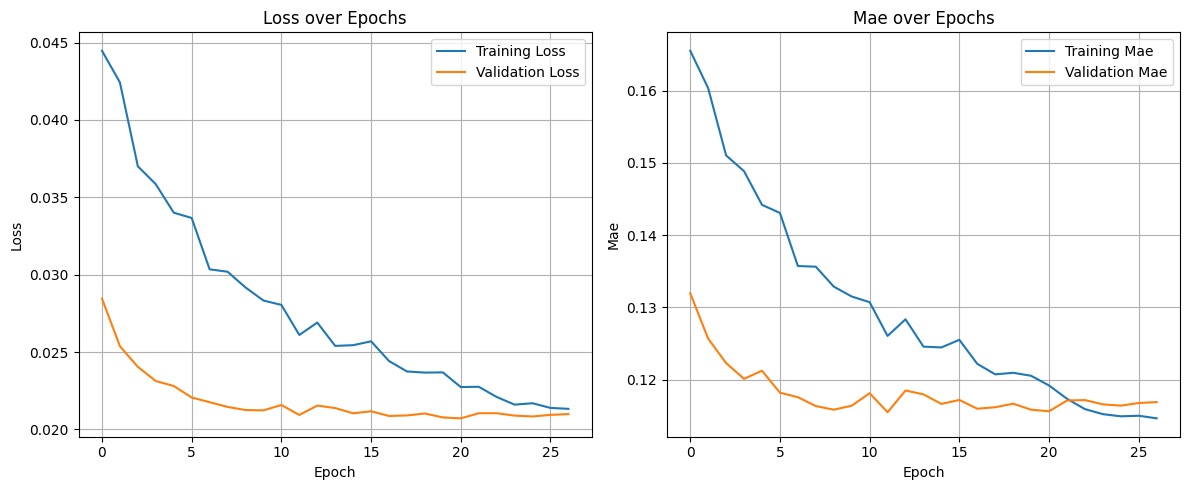

Current learning rate: 1e-05


In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation metrics from the Keras History object.

    Parameters:
    - history: Keras History object returned by model.fit()
    """
    # Extract metric names from history
    metrics = list(history.history.keys())

    # Identify training and validation metrics
    train_metrics = [m for m in metrics if not m.startswith('val_')]
    val_metrics = [m for m in metrics if m.startswith('val_')]

    # Number of metrics to plot
    num_metrics = len(train_metrics)

    # Set up the matplotlib figure
    plt.figure(figsize=(6 * num_metrics, 5))

    for i, metric in enumerate(train_metrics):
        plt.subplot(1, num_metrics, i + 1)
        plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')
        # Check if validation metric exists
        val_metric = f'val_{metric}'
        if val_metric in history.history:
            plt.plot(history.history[val_metric], label=f'Validation {metric.capitalize()}')
        plt.title(f'{metric.capitalize()} over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_loss_mae(history):
    """
    Plots training and validation MAE from the Keras history object.

    Parameters:
    - history: Keras History object from model.fit()
    """
    plt.figure(figsize=(10, 6))

    # Plot MAE for training and validation
    plt.plot(history.history['mae'], label='Training MAE')
    if 'val_mae' in history.history:
        plt.plot(history.history['val_mae'], label='Validation MAE')

    plt.title('Model Mean Absolute Error (MAE)')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
#plot_loss_mae(history)
plot_training_history(history)

learning_rate = Nasnet_model.optimizer.learning_rate.numpy()
print("Current learning rate:", learning_rate)

In [ ]:
import tensorflow as tf
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Callback Definitions
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=10
)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7
)

# Load NASNetMobile
base_model = tf.keras.applications.NASNetMobile(
    input_shape=(224, 224, 3), weights='imagenet', include_top=False
)
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input

# Unfreeze the last 20 layers
base_model.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add Custom Layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(
    1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)
)(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout for regularization
output = tf.keras.layers.Dense(1, activation='linear')(x)  # Regression output

# Define Model
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Compile Model
Nasnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse',
    metrics=['mae']
)

# Data Augmentation Pipeline
augmentation_pipeline = A.Compose([
    A.Rotate(limit=10, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.5),
    A.Normalize()
])

# Custom Data Generator with Augmentation
class AlbumentationsDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, images, labels, batch_size=32, augmentations=None, shuffle=True):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.augmentations = augmentations
        self.shuffle = shuffle
        self.indices = np.arange(len(self.images))
        self.on_epoch_end()

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = [self.images[i] for i in batch_indices]
        batch_labels = [self.labels[i] for i in batch_indices]

        # Apply augmentations
        if self.augmentations:
            batch_images = [self.augmentations(image=image)['image'] for image in batch_images]
        return np.array(batch_images), np.array(batch_labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# Initialize the custom data generator
train_generator = AlbumentationsDataGenerator(
    images=X_train, labels=Y_train, batch_size=32, augmentations=augmentation_pipeline
)

# Preprocess Validation Data
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid))

# Train Model
history = Nasnet_model.fit(
    train_generator,
    validation_data=(X_valid_processed_Nasnet, Y_valid),
    epochs=100,
    verbose=1,
    callbacks=[early_stopping_Nasnet, lr_scheduler]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 69s 282ms/step - loss: 10.1378 - mae: 0.4395 - val_loss: 8.2140 - val_mae: 0.1767 - learning_rate: 1.0000e-04
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 47s 104ms/step - loss: 7.7669 - mae: 0.2510 - val_loss: 6.3180 - val_mae: 0.1598 - learning_rate: 1.0000e-04
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - loss: 5.9398 - mae: 0.1952 - val_loss: 4.8175 - val_mae: 0.1438 - learning_rate: 1.0000e-04
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - loss: 4.5165 - mae: 0.1613 - val_loss: 3.6588 - val_mae: 0.1385 - learning_rate: 1.0000e-04
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 3.4263 - mae: 0.1455 - val_loss: 2.7721 - val_mae: 0.1340 - learning_rate: 1.0000e-04
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 2.5919 - mae: 0.1310 - val_loss: 2.1030 - val_mae: 0.1480 - learning_rate: 1.0000e-04
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - loss: 1.9576 - mae: 0.1272 - val_loss: 1.5817 - val_ma

In [ ]:
### Mobilenet basic
early_stopping_MobileNet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
#base_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Mobilenet = tf.keras.applications.mobilenet_v3.preprocess_input
base_model.trainable = False
base_model.trainable = False
for layer in base_model.layers[-1:]:
    layer.trainable = True

# Add custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.7)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model with MobileNet as the base
Mobilenet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_train))
X_valid_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_valid))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(f'Nb layer : {len(Mobilenet_model.layers)}')

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Num GPUs Available:  1
Nb layer : 161


In [ ]:
Mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history = Mobilenet_model.fit(X_train_processed_Mobilenet, Y_train, validation_data=(X_valid_processed_Mobilenet, Y_valid), batch_size=32, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step - loss: 0.0609 - mae: 0.1951 - val_loss: 0.0341 - val_mae: 0.1431
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0476 - mae: 0.1743 - val_loss: 0.0317 - val_mae: 0.1375
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0474 - mae: 0.1723 - val_loss: 0.0296 - val_mae: 0.1323
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0420 - mae: 0.1612 - val_loss: 0.0269 - val_mae: 0.1264
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0411 - mae: 0.1595 - val_loss: 0.0265 - val_mae: 0.1250
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0393 - mae: 0.1541 - val_loss: 0.0250 - val_mae: 0.1214
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0375 - mae: 0.1505 - val_loss: 0.0234 - val_mae: 0.1179
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0352 - mae: 0.1478 - val_loss: 0.0227 - val_mae: 0.1159
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7m

In [ ]:
### Mobilenet Small implementation with 0.5 Dropout and -10
early_stopping_MobileNet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

#base_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Mobilenet = tf.keras.applications.mobilenet_v3.preprocess_input

base_model.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model with MobileNet as the base
Mobilenet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_train))
X_valid_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_valid))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(f'Nb layer : {len(Mobilenet_model.layers)}')

Num GPUs Available:  1
Nb layer : 161


In [ ]:
Mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history = Mobilenet_model.fit(X_train_processed_Mobilenet, Y_train, validation_data=(X_valid_processed_Mobilenet, Y_valid), batch_size=32, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - loss: 0.0520 - mae: 0.1816 - val_loss: 0.0286 - val_mae: 0.1349
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0415 - mae: 0.1591 - val_loss: 0.0261 - val_mae: 0.1252
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0371 - mae: 0.1491 - val_loss: 0.0248 - val_mae: 0.1223
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0355 - mae: 0.1478 - val_loss: 0.0239 - val_mae: 0.1191
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0332 - mae: 0.1395 - val_loss: 0.0229 - val_mae: 0.1171
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0327 - mae: 0.1416 - val_loss: 0.0225 - val_mae: 0.1155
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0292 - mae: 0.1328 - val_loss: 0.0223 - val_mae: 0.1145
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0268 - mae: 0.1286 - val_loss: 0.0214 - val_mae: 0.1133
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8m

In [ ]:
### Mobilenet Small implementation with 0.7 Dropout and -5
early_stopping_MobileNet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

#base_model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

#preprocess_input = tf.keras.applications.mobilenet.preprocess_input
preprocess_input_Mobilenet = tf.keras.applications.mobilenet_v3.preprocess_input

base_model.trainable = False
for layer in base_model.layers[-3:]:
    layer.trainable = True

# Add custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model with NASNetMobile as the base
Mobilenet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
# Preprocess the data
X_train_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_train))
X_valid_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_valid))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Num GPUs Available:  1


In [ ]:
Mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mse', metrics=['accuracy'])
history = Mobilenet_model.fit(X_train_processed_Mobilenet, Y_train, validation_data=(X_valid_processed_Mobilenet, Y_valid), batch_size=32, epochs=100, shuffle=True, verbose=1,callbacks=[early_stopping_Nasnet])

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.0000e+00 - loss: 0.0533 - val_accuracy: 0.0000e+00 - val_loss: 0.0293
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0414 - val_accuracy: 0.0000e+00 - val_loss: 0.0261
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0410 - val_accuracy: 0.0000e+00 - val_loss: 0.0244
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0361 - val_accuracy: 0.0000e+00 - val_loss: 0.0231
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0346 - val_accuracy: 0.0000e+00 - val_loss: 0.0223
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0324 - val_accuracy: 0.0000e+00 - val_loss: 0.0218
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0299 - val_accuracy: 0.0000e+00 - val_loss: 0.0212
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
# defining category

def age_to_class(age):
    age = int(age)
    if 0 <= age <= 2:
        return 0
    elif 3 <= age <= 9:
        return 1
    elif 10 <= age <= 20:
        return 2
    elif 21 <= age <= 27:
        return 3
    elif 28 <= age <= 45:
        return 4
    elif 46 <= age <= 65:
        return 5
    else:
      return 6

In [ ]:
# Ensure Y_train and Y_valid are scaled correctly before applying the function
Y_train = pd.DataFrame(Y_train2 * 100)
Y_valid = pd.DataFrame(Y_valid2 * 100)

# Initialize arrays for class labels
Y_train_class = np.zeros(Y_train.shape[0])
Y_valid_class = np.zeros(Y_valid.shape[0])

# Loop over Y_train and apply age_to_class
for i in range(Y_train.shape[0]):
    age = Y_train.iloc[i, 0]  # Access the age value in the first column
    Y_train_class[i] = age_to_class(age)

# Loop over Y_valid and apply age_to_class
for i in range(Y_valid.shape[0]):
    age = Y_valid.iloc[i, 0]  # Access the age value in the first column
    Y_valid_class[i] = age_to_class(age)

Y_train = pd.DataFrame(Y_train / 100)
Y_valid = pd.DataFrame(Y_valid / 100)


# Convert the class arrays to DataFrames for easy counting and analysis
Y_train_class_df = pd.DataFrame(Y_train_class, columns=['class'])
Y_valid_class_df = pd.DataFrame(Y_valid_class, columns=['class'])

Y_train_class_np = np.array(Y_train_class)
Y_valid_class_np = np.array(Y_valid_class)

# Get and print the counts of each class
print("Y_train class distribution:")
print(Y_train_class_df['class'].value_counts().sort_index())

print("\nY_valid class distribution:")
print(Y_valid_class_df['class'].value_counts().sort_index())

num_classes = len(np.unique(Y_train_class_np))

# Convert class labels to one-hot encoding
Y_train_class_np_onehot = tf.keras.utils.to_categorical(Y_train_class_np, num_classes=7)
Y_valid_class_np_onehot = tf.keras.utils.to_categorical(Y_valid_class_np, num_classes=7)

Y_train class distribution:
class
0.0    1882
1.0    1634
2.0    1849
3.0    4111
4.0    5620
5.0    3315
6.0    1589
Name: count, dtype: int64

Y_valid class distribution:
class
0.0     82
1.0     80
2.0    100
3.0    192
4.0    299
5.0    172
6.0     75
Name: count, dtype: int64


In [ ]:
Y_valid_class_np[:20]

array([2., 2., 9., 7., 2., 1., 2., 0., 0., 0., 2., 5., 2., 2., 0., 4., 0.,
       5., 4., 2.])

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation metrics from the Keras History object.

    Parameters:
    - history: Keras History object returned by model.fit()
    """
    # Extract metric names from history
    metrics = list(history.history.keys())

    # Identify training and validation metrics
    train_metrics = [m for m in metrics if not m.startswith('val_')]
    val_metrics = [m for m in metrics if m.startswith('val_')]

    # Number of metrics to plot
    num_metrics = len(train_metrics)

    # Set up the matplotlib figure
    plt.figure(figsize=(6 * num_metrics, 5))

    for i, metric in enumerate(train_metrics):
        plt.subplot(1, num_metrics, i + 1)
        plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')

        # Check if validation metric exists
        val_metric = f'val_{metric}'
        if val_metric in history.history:
            plt.plot(history.history[val_metric], label=f'Validation {metric.capitalize()}')
        plt.title(f'{metric.capitalize()} over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_loss_mae(history):
    """
    Plots training and validation MAE from the Keras history object.

    Parameters:
    - history: Keras History object from model.fit()
    """
    plt.figure(figsize=(10, 6))

    # Plot MAE for training and validation
    plt.plot(history.history['val_accuracy'], label='Training accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation accuracy')

    plt.title('Model Mean Absolute Error (MAE)')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
#plot_loss_mae(history)
plot_training_history(history)

learning_rate = Nasnet_model.optimizer.learning_rate.numpy()
print("Current learning rate:", learning_rate)

In [ ]:
# Early stopping callback
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)

# Load NASNetMobile with pre-trained ImageNet weights, excluding the top layer
base_model = tf.keras.applications.NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input

# Set trainable layers
base_model.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Adding custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
#x = tf.keras.layers.Dropout(0.5)(x)  # Dropout with 50% probability
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout with 50% probability
output = tf.keras.layers.Dense(10, activation='softmax')(x)  # Sigmoid for binary classification

# Create the new model with NASNetMobile as the base
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)



# Preprocess the data
X_train_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_train2))
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid2))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Compile the model with crossentropy loss for binary classification
Nasnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss='categorical_crossentropy', metrics=['accuracy'])
history = Nasnet_model.fit(X_train_processed_Nasnet, Y_train_class_np_onehot, validation_data=(X_valid_processed_Nasnet, Y_valid_class_np_onehot), batch_size=32, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 59ms/step - accuracy: 0.2479 - loss: 1.8870 - val_accuracy: 0.4060 - val_loss: 1.5163
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3591 - loss: 1.5877 - val_accuracy: 0.4430 - val_loss: 1.4155
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.3869 - loss: 1.4966 - val_accuracy: 0.4550 - val_loss: 1.3587
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4291 - loss: 1.4089 - val_accuracy: 0.4750 - val_loss: 1.3245
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4355 - loss: 1.3721 - val_accuracy: 0.4930 - val_loss: 1.2984
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4517 - loss: 1.3339 - val_accuracy: 0.4950 - val_loss: 1.2781
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4569 - loss: 1.3158 - val_accuracy: 0.4820 - val_loss: 1.2689
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4715 - loss: 1

KeyboardInterrupt: 

In [ ]:
# Early stopping callback
early_stopping_Nasnet = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)

# Load MobileNet with pre-trained ImageNet weights, excluding the top layer
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
preprocess_input_MobileNet = tf.keras.applications.mobilenet_v3.preprocess_input


# Set trainable layers
base_model.trainable = False
for layer in base_model.layers[-3:]:
    layer.trainable = True

for layer in base_model.layers[:5]:
    layer.trainable = True

# Adding custom layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout with 50% probability
output = tf.keras.layers.Dense(10, activation='softmax')(x)  # Sigmoid for binary classification

# Create the new model with NASNetMobile as the base
MobileNet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)



# Preprocess the data
X_train_processed_MobileNet = preprocess_input_MobileNet(np.copy(X_train2))
X_valid_processed_MobileNet = preprocess_input_MobileNet(np.copy(X_valid2))

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Num GPUs Available:  1


In [ ]:
# Compile the model with crossentropy loss for binary classification
MobileNet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss='categorical_crossentropy', metrics=['accuracy'])
history = MobileNet_model.fit(X_train_processed_MobileNet, Y_train_class_np_onehot, validation_data=(X_valid_processed_MobileNet, Y_valid_class_np_onehot), batch_size=32, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.1422 - loss: 31.7731 - val_accuracy: 0.2820 - val_loss: 30.7141
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2391 - loss: 30.5120 - val_accuracy: 0.2850 - val_loss: 29.6856
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2445 - loss: 29.5197 - val_accuracy: 0.2850 - val_loss: 28.7188
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2537 - loss: 28.5327 - val_accuracy: 0.2930 - val_loss: 27.7910
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2723 - loss: 27.6182 - val_accuracy: 0.2930 - val_loss: 26.8959
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2663 - loss: 26.7426 - val_accuracy: 0.2960 - val_loss: 26.0311
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2983 - loss: 25.8390 - val_accuracy: 0.3040 - val_loss: 25.1897
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3013 - los

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate predictions on the validation set
predictions = Nasnet_model.predict(X_valid_processed_Nasnet)

# Step 2: Convert predictions to class labels
# Each prediction is an array of probabilities for each class; take the class with the highest probability
predicted_labels = np.argmax(predictions, axis=1)

# Ensure Y_valid_class_np is the true label array for validation set
true_labels = Y_valid_class_np  # Assuming Y_valid_class_np contains true class labels

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_true and y_pred are your true and predicted labels respectively
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1])  # Example true labels
y_pred = np.array([0, 0, 0, 1, 1, 1, 0, 1])  # Example predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize confusion matrix to percentage (by rows)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Print the confusion matrix with percentages
print("Confusion Matrix (in %):")
print(np.round(cm_percentage, 2))  # Round to 2 decimal places for better readability

# Optionally, you can plot the confusion matrix for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title("Confusion Matrix (Percentage)")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Evaluate on the test set
X_test = np.load(f'{base_dir}/data_test.npy')
X_test_processed = preprocess_input(np.copy(X_test))
Y_test = np.load(f'{base_dir}/labels_test.npy')
Y_test = Y_test / 100

test_loss, test_mae = Nasnet_model.evaluate(X_test_processed, Y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1217 - mae: 0.1217
Test Loss: 0.12220822274684906
Test MAE: 0.12220822274684906


In [ ]:
results = Nasnet_model.evaluate(X_test_processed, Y_test, verbose=1)

Nasnet_model.metrics

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1219 - mae: 0.1219


[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/combined_faces_train_augmented.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

Data decompressed successfully


In [ ]:
import os
base_dir2 = '/content/content/combined_faces_train_augmented/'

X_train2_df = pd.read_csv(f'/content/images_filenames_labels_train_augmented.csv')

Y_train2 = X_train2_df['age'].copy().to_numpy()
Y_valid2 = Y_train2[20000:21000]
Y_train2 = Y_train2[:20000]
Y_train2 = Y_train2 / 100
Y_valid2 = Y_valid2 / 100


X_train2_df = X_train2_df.drop(columns=['age'])
X_train2 = X_train2_df.to_numpy()

print(X_train2[:20])
image_list = []
nb = 0
for i in X_train2_df['filename'][:20000]:
     img = Image.open(i).convert("RGB")
     img = img.resize((224,224))
     #image_list = np.append(image_list,img)
     img_array = np.array(img)
     image_list.append(img_array)
     nb+=1
     if ( nb % 1000==0):
         print(f"completed {nb} images")
np.save(f'{base_dir2}/data2_train.npy', image_list)

image_list = []

for i in X_train2_df['filename'][20000:21000]:
     img = Image.open(i).convert("RGB")
     img = img.resize((224,224))
     #image_list = np.append(image_list,img)
     img_array = np.array(img)
     image_list.append(img_array)
     nb+=1
     if ( nb % 1000==0):
         print(f"completed {nb} images")

np.save(f'{base_dir2}/data2_valid.npy', image_list)

X_train2 = np.load(f'{base_dir2}/data2_train.npy')
X_valid2 = np.load(f'{base_dir2}/data2_valid.npy')



[['/content/content/combined_faces_train_augmented/43_77_rot_pos40.jpg']
 ['/content/content/combined_faces_train_augmented/71_50_fliplr_rot_neg20.jpg']
 ['/content/content/combined_faces_train_augmented/6_51_fliplr_rot_pos40.jpg']
 ['/content/content/combined_faces_train_augmented/18_301_fliplr_rot_neg20.jpg']
 ['/content/content/combined_faces_train_augmented/25_686_rot_neg40.jpg']
 ['/content/content/combined_faces_train_augmented/26_2143_fliplr.jpg']
 ['/content/content/combined_faces_train_augmented/26_1542.jpg']
 ['/content/content/combined_faces_train_augmented/3_463_fliplr_rot_neg40.jpg']
 ['/content/content/combined_faces_train_augmented/33_84_rot_pos20.jpg']
 ['/content/content/combined_faces_train_augmented/39_35_fliplr_rot_neg40.jpg']
 ['/content/content/combined_faces_train_augmented/1_343_rot_pos40.jpg']
 ['/content/content/combined_faces_train_augmented/78_50_rot_neg40.jpg']
 ['/content/content/combined_faces_train_augmented/44_59_rot_neg20.jpg']
 ['/content/content/comb

In [ ]:
print(np.shape(X_train2))
Y_train2 = Y_train2[:20000]

print(Y_train2[:20])

(20000, 224, 224, 3)
[0.43 0.71 0.06 0.18 0.25 0.26 0.26 0.03 0.33 0.39 0.01 0.78 0.44 0.26
 0.02 0.27 0.3  0.25 0.25 0.59]


In [ ]:
from sklearn.metrics import mean_absolute_error
Nasnet_prediction = Nasnet_model.predict(X_valid2)
Mobilenet_prediction = Mobilenet_model.predict(X_valid2)
predictions = (Nasnet_prediction*0.4 ) + (0.6*Mobilenet_prediction)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:

mae = mean_absolute_error(Y_valid2, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

In [ ]:
# loading the train data (with labels)
X_train = np.load(f'{base_dir}data_train.npy')
Y_train = np.load(f'{base_dir}/labels_train.npy')
M_train = np.load(f'{base_dir}/meta_data_train.npy')

# loading the validation data (with labels)
X_valid = np.load(f'{base_dir}/data_valid.npy')
Y_valid = np.load(f'{base_dir}/labels_valid.npy')
M_valid = np.load(f'{base_dir}/meta_data_valid.npy')
# train labels are real numbers, ranging from ~0.9 to ~89 (years old);
# we will re-scale the labels to [0,1] by using a normalization factor of 100,
# assuming there is no sample with age > 100.
Y_train = Y_train/100
Y_valid = Y_valid/100
# them using the raw data, i.e., the apparent age values
print('Train data size and shape', X_train.shape)
print('Train labels size and shape', Y_train.shape)
print('Train metadata size and shape', M_train.shape)
print('----')
print('Valid data size and shape', X_valid.shape)
print('Valid labels size and shape', Y_valid.shape)
print('Valid metadata size and shape', M_valid.shape)

base_model = tf.keras.applications.NASNetMobile(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
preprocess_input_Nasnet = tf.keras.applications.nasnet.preprocess_input
Nasnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
X_train_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_train))
X_valid_processed_Nasnet = preprocess_input_Nasnet(np.copy(X_valid))


base_model1 = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
preprocess_input_Mobilenet = tf.keras.applications.mobilenet_v3.preprocess_input
X_train_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_train))
X_valid_processed_Mobilenet = preprocess_input_Mobilenet(np.copy(X_valid))